In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch
import torchvision.transforms as transforms
import math


# Homework 9 - Neural Networks 2


Your task is to fill out the missing parts of the code. 

This will be a the first time that you will build a simple neural network using the torch library.
I suggest first to solve the task on MNIST dataset (28x28x1 images) and then on CIFAR-10 dataset (32x32x3 images).
It's better to first try on MNIST, so you can iterate faster on the solution, and then move to CIFAR-10.
- You are expected to reach at least 90% accuracy on the test set for MNIST (use_cifar=False).
- If you succeed on MNIST, you are expected to reach at least 40% accuracy on the test set for CIFAR-10 (use_cifar=True). This will take potentially more
time (depending on your hardware), but you should still be able to reach at least 40% accuracy on the test set.
Feel free to add second hidden layer, but this should not be necessary.

It is a simple task, so don't try to make the model too big (i.e. don't make the hidden_size too big).

Note: I introduce the validation loss to avoid the overfitting. Throughout the course I was mentioning the concept of overfitting, but I did not go into details.
This will happen at some point. For now, make sure that you do not get to the point where the validation loss goes up while the training loss goes down. 
This is a sign of overfitting.

Once you're done with the task, compute (estimate) the number of parameters in the model.

In [2]:
def load_data(batch_size=64, val_size=1000, cifar=False):
    """
    Loads dataset and returns DataLoader objects.

    :param batch_size: Number of samples per batch
    :param val_size: Number of samples for validation set
    :param cifar: If True, loads CIFAR-10 dataset, otherwise MNIST
    :returns: train_loader, test_loader, val_loader
    """
    print(f"Loading {'CIFAR-10' if cifar else 'MNIST'} dataset...")
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            if not cifar
            else transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )
    dataset_object = (
        torchvision.datasets.CIFAR10 if cifar else torchvision.datasets.MNIST
    )

    train_dataset = dataset_object(
        root="./data", train=True, download=True, transform=transform
    )
    test_dataset = dataset_object(
        root="./data", train=False, download=True, transform=transform
    )
    train_dataset, val_dataset = torch.utils.data.random_split(
        train_dataset, [len(train_dataset) - val_size, val_size]
    )

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True, num_workers=2
    )
    val_loader = torch.utils.data.DataLoader(
        val_dataset, batch_size=batch_size, shuffle=True, num_workers=2
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, num_workers=2
    )
    print(
        f"Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}"
    )
    return train_loader, test_loader, val_loader

In [72]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super(SimpleMLP, self).__init__()
        """
        Implement the SimpleMLP model.
        It should have one hidden layer with an appropriate activation function.
        i.e. input -> non-linearity -> output -> non-linearity -> output
        Feel free to use any activation function you want, but ReLU is a safe choice.
        """
        # <your_code_here>
        print("nn sizes, input, hidden, output", input_size, hidden_size, output_size)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.input =  nn.Linear(input_size, hidden_size).to(device)
        self.hidden = nn.Linear(hidden_size, output_size).to(device)
        self.output = nn.Linear(output_size, 10).to(device)
        self.activation = nn.PReLU().to(device)
        self.activation2 = nn.PReLU().to(device)

        # </your_code_here>

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Implement the forward pass of the model.
        :param x: Input tensor, of shape (batch_size, input_size)
        """
        # <your_code_here>
        #print("shape of x", x.shape)
        #print(x)
        #x = x.view(x.size(0), -1) \
    
        #xx = torch_flatten(x, start_dim=1)
        
        #print(x.shape)
        #print(xx.shape, "shape")
        #xx = torch.flatten(xx)
        #x = self.activation.forward(x)
        #print("shape of x after first activation", x.shape)
        #xx = self.activation(xx)
        #xx = self.input(xx)            
        #xx = self.activation(xx)
        #xx = self.hidden(xx)

        #xx = torch.flatten(xx)
        #print(x.device)    
        x = self.input(x)
        
        x = self.activation(x)
        x = self.hidden(x)
        x = self.activation(x)
        out = self.output(x)

        #print(out.data)
        # </your_code_here>
        return out


In [68]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    """
    Trains the MLP model on the training data.

    :param model: The neural network model
    :param train_loader: DataLoader for training data
    :param val_loader: DataLoader for validation data
    :param criterion: Loss function
    :param optimizer: Optimizer
    :param num_epochs: Number of training epochs
    """
    # we need to set the model to training mode
    model.train()
    running_loss = []
    running_validation = []
    for epoch in range(num_epochs):
        running_loss_epoch = 0.0
        running_validation_epoch = 0.0
        for images, labels in train_loader:
            """
            Implement the training loop.
            It should include:
            1. Forward pass (passing the images through the model)
            2. Loss computation (using the criterion input function)
            3. Backward pass (computing the gradients)
            4. Optimization step (updating the model parameters)
            
            Note: you will be using the torch optimizer.
            First you need to zero the gradients in the optimizer (clear the gradients from the previous epoch)
            Then you need to call the backward pass on the loss (compute the gradients)
            Finally, you need to call the step function on the optimizer (to update the model parameters)
            """
            # <your_code_here>
            images = images.view(images.size(0), -1)
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            
            images = images.to(device)
            
            outputs = model.forward(images)
            #print(labels)
            #labels = labels.type(torch.FloatTensor) 
            #outputs = outputs.type(torch.FloatTensor) 
            #print(outputs, labels)
            labels = labels.to(device)
            loss = criterion(outputs, labels)
            #loss.requires_grad = True
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # </your_code_here>

            running_loss_epoch += loss.item()

        for images, labels in val_loader:
            """
            Implement the validation loop.
            It should include:
            1. Forward pass (passing the images through the model)
            2. Loss computation
            Note: for validation we do not need to compute the gradients. 
            It is critical not to compute the gradients for validation, as it will slow down the training.
            """
            # <your_code_here>
            optimizer.zero_grad()
            #print(images.shape)
            images = images.view(images.size(0), -1)
            images = images.to(device)

            outputs = model.forward(images)
            labels = labels.to(device)
            #labels = labels.type(torch.FloatTensor) 
            loss = criterion(outputs, labels)
            # </your_code_here>
            running_validation_epoch += loss.item()

        average_loss = running_loss_epoch / len(train_loader)
        average_validation = running_validation_epoch / len(val_loader)
        running_loss.append(average_loss)
        running_validation.append(average_validation)

        print(
            f"Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Validation Loss: {average_validation:.4f}"
        )

    print("Finished Training")
    return running_loss, running_validation


In [74]:
def evaluate_model(model, test_loader):
    """
    Evaluates the trained model on the test data.

    :param model: The neural network model
    :param test_loader: DataLoader for test data
    """
    # we need to set the model to evaluation mode
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            print(outputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy of the model on the test images: {100 * correct / total:.2f}%")

In [91]:
use_cifar = True  # try on MNIST first, then on CIFAR-10 (set to True)
image_dim = 32 if use_cifar else 28
input_size = image_dim * image_dim if not use_cifar else 3 * image_dim * image_dim
# <feel_free_to_change>
# the higher the hidden_size, the more parameters the model has, and the more likely to overfit
hidden_size = image_dim*3
# learning rate is the step size for the optimizer
learning_rate = 0.001
# the higher the learning rate, the longer the training (and the more likely to overfit)
num_epochs = 16
# the higher the batch_size, the faster the training, but the memory consumption is higher
# Note: batch size should be a multiple of 2, i.e. 4, 16, 32, 64, 128, 256, 512, 1024, etc.
batch_size = 64 # good default value
# </feel_free_to_change>
output_size = 10  # MNIST has 10 classes (digits 0-9), CIFAR-10 has 10 classes (objects)


# Load data
train_loader, test_loader, val_loader = load_data(
    batch_size=batch_size, cifar=use_cifar
)


# Initialize the model, loss function, and optimizer
model = SimpleMLP(input_size, hidden_size, output_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
running_loss, running_validation_loss = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs
)


Loading CIFAR-10 dataset...
Files already downloaded and verified
Files already downloaded and verified
Train size: 49000, Validation size: 1000, Test size: 10000
nn sizes, input, hidden, output 3072 32 10
Epoch [1/16], Loss: 1.9972, Validation Loss: 1.8790
Epoch [2/16], Loss: 1.8266, Validation Loss: 1.7856
Epoch [3/16], Loss: 1.7543, Validation Loss: 1.7414
Epoch [4/16], Loss: 1.7114, Validation Loss: 1.7120
Epoch [5/16], Loss: 1.6799, Validation Loss: 1.6772
Epoch [6/16], Loss: 1.6544, Validation Loss: 1.6581
Epoch [7/16], Loss: 1.6330, Validation Loss: 1.6410
Epoch [8/16], Loss: 1.6143, Validation Loss: 1.6308
Epoch [9/16], Loss: 1.5985, Validation Loss: 1.6379
Epoch [10/16], Loss: 1.5849, Validation Loss: 1.6184
Epoch [11/16], Loss: 1.5716, Validation Loss: 1.6215
Epoch [12/16], Loss: 1.5611, Validation Loss: 1.6099
Epoch [13/16], Loss: 1.5500, Validation Loss: 1.5967
Epoch [14/16], Loss: 1.5394, Validation Loss: 1.6071
Epoch [15/16], Loss: 1.5305, Validation Loss: 1.5896
Epoch [1

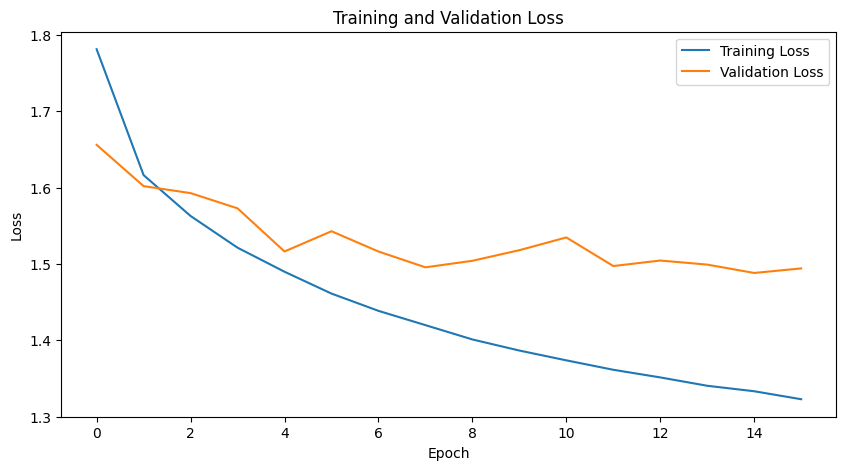

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(running_loss, label="Training Loss")
plt.plot(running_validation_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [88]:
# Evaluate the model
evaluate_model(model, test_loader)

tensor([[-1.5840e+00, -4.3953e-01,  2.7798e-01,  2.3659e+00, -1.6682e+00,
          1.7798e+00, -8.6399e-02, -2.2712e+00,  2.1379e+00, -3.5083e-01],
        [ 4.6503e-01,  2.6191e+00, -1.9474e+00, -2.0745e+00, -2.1173e+00,
         -4.3336e+00, -5.9535e+00, -5.3132e+00,  6.7116e+00,  3.8792e+00],
        [ 2.4470e+00,  1.7369e+00, -1.7569e+00, -2.8876e+00, -9.5390e-01,
         -4.0226e+00, -7.4739e+00, -1.5032e+00,  4.4656e+00,  2.0892e+00],
        [ 1.8429e+00, -1.1014e+00,  1.8768e+00, -1.1784e+00,  7.6260e-01,
         -1.8670e+00, -4.0827e+00, -2.1239e-01,  1.9104e+00, -6.8374e-01],
        [-1.9528e+00, -2.3429e+00,  4.9906e-01,  4.1507e-01,  3.6051e+00,
         -1.9086e-01,  1.7671e+00, -3.9335e-01, -1.6958e+00, -2.3658e+00],
        [-1.7736e+00, -1.5699e+00, -2.5772e-01,  1.1481e+00, -5.1480e-01,
          4.3573e-01,  2.8123e+00, -9.8846e-01, -5.2010e+00, -1.0895e+00],
        [-4.8626e-01,  1.3525e+00, -1.3112e+00,  2.8337e+00, -3.7740e+00,
          2.6231e+00,  1.1210e+0

Let's visualize the weight matrix of the first layer fc1.weight
Think about what the weight matrix means in this context.


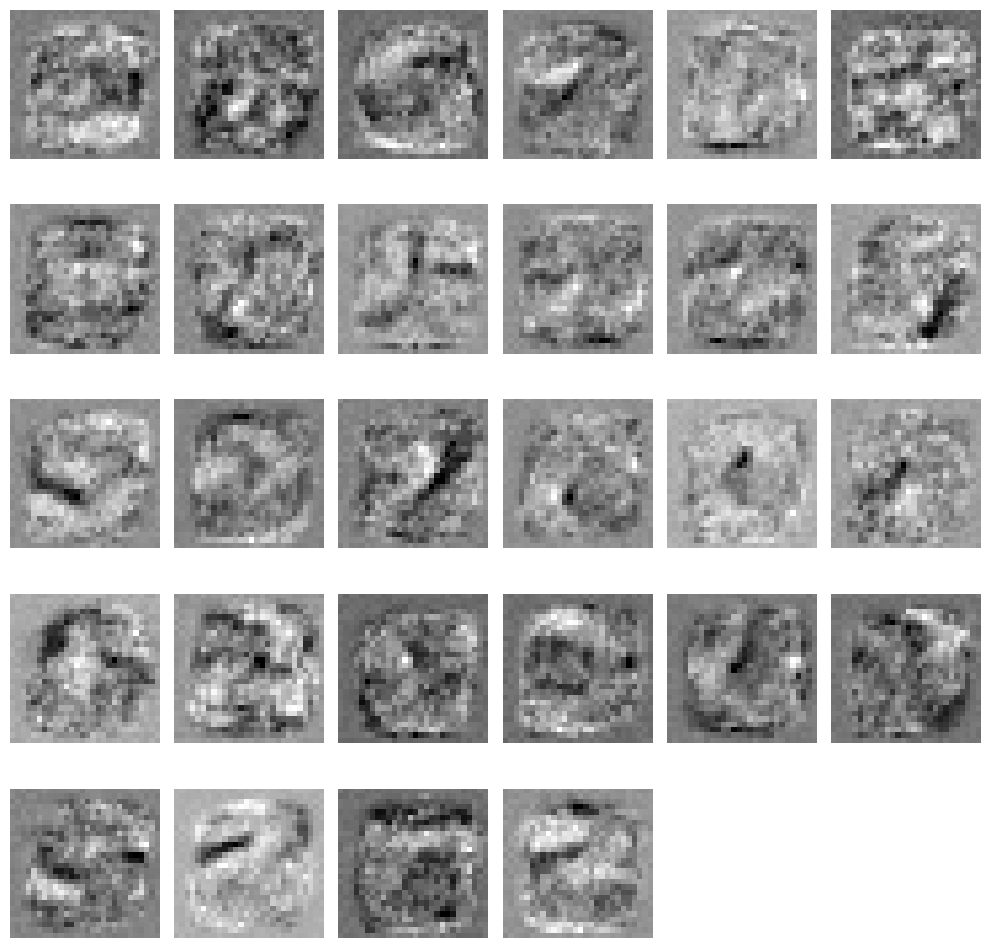

In [84]:
print("Let's visualize the weight matrix of the first layer fc1.weight")
print("Think about what the weight matrix means in this context.")
if use_cifar:
    param = model.fc1.weight.data.view(-1, 3, image_dim, image_dim)
else:
    param = model.input.weight.data.view(-1, image_dim, image_dim).to("cpu")

num_images = param.shape[0]
num_images_columns = math.ceil(np.sqrt(num_images))
num_images_rows = math.ceil(num_images / num_images_columns)
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_images_rows, num_images_columns, i + 1)
    param_i = (param[i] - param[i].min()) / (param[i].max() - param[i].min())
    if use_cifar:
        plt.imshow(param_i.detach().numpy().transpose(1, 2, 0))
    else:
        plt.imshow(param_i.detach().numpy(), cmap="gray")
    plt.axis("off")  # Remove tickers (axis labels and ticks)
plt.tight_layout()  # Adjust spacing between subplots
plt.show()
